In [227]:
# Author:   Kelan Morgan
# Purpose:  Machine Learning Portfolio

# Data:
# - UN WPP (2022); HMD (2023); Zijdeman et al. (2015); Riley (2005) – with minor processing by Our World in Data. “Life expectancy at birth – 
# Various sources – period tables” [dataset]. Human Mortality Database, “Human Mortality Database”; United Nations, 
# “World Population Prospects 2022”; United Nations, “World Population Prospects”; Zijdeman et al., “Life Expectancy at birth 2”; James C. Riley, 
# “Estimates of Regional and Global Life Expectancy, 1800-2001” [original data]. Retrieved October 22, 2024 from https://ourworldindata.org/grapher/life-expectancy

In [228]:
# Imports
import pandas
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np
from sklearn.linear_model import LinearRegression

In [229]:
# Load CSV
data = pandas.read_csv("Data/life-expectancy.csv", sep = ",", header = 0)

print(data.values)

[['Afghanistan' 'AFG' 1950 27.7275]
 ['Afghanistan' 'AFG' 1951 27.9634]
 ['Afghanistan' 'AFG' 1952 28.4456]
 ...
 ['Zimbabwe' 'ZWE' 2019 61.2925]
 ['Zimbabwe' 'ZWE' 2020 61.1242]
 ['Zimbabwe' 'ZWE' 2021 59.2531]]


In [230]:
# Data Pre-Processing

# Re-name life expectancy column and remove bad data before 1800s
data.rename(columns={"Period life expectancy at birth - Sex: all - Age: 0": "Life Expectancy"}, inplace=True)
data = data[data['Year'] > 1800]

# get all rows with country codes
CountryData = data.dropna(subset=['Code'])
CountryData = CountryData[~CountryData['Code'].str.contains("OWID", na=False)]

print(data['Year'])
print(data['Life Expectancy'])

0        1950
1        1951
2        1952
3        1953
4        1954
         ... 
20750    2017
20751    2018
20752    2019
20753    2020
20754    2021
Name: Year, Length: 20640, dtype: int64
0        27.7275
1        27.9634
2        28.4456
3        28.9304
4        29.2258
          ...   
20750    60.7095
20751    61.4141
20752    61.2925
20753    61.1242
20754    59.2531
Name: Life Expectancy, Length: 20640, dtype: float64


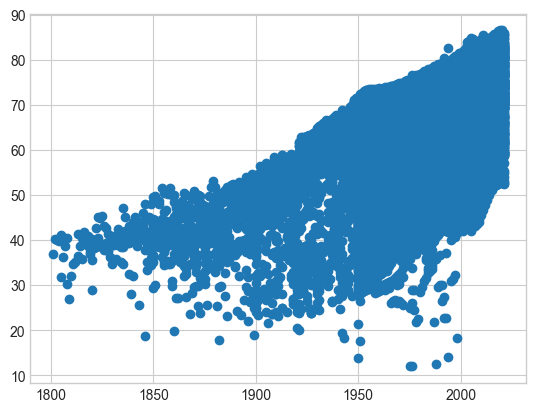

In [231]:
#graph of all data
x = data['Year']
y = data['Life Expectancy']

plt.scatter(x, y)


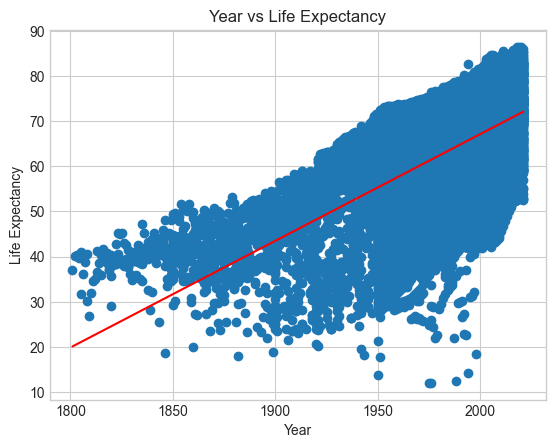

In [232]:
model = LinearRegression(fit_intercept=True)

model.fit(x.to_numpy()[:, np.newaxis], y)

xfit = np.linspace(min(data['Year']), max(data['Year']), 1000)
yfit = np.clip(model.predict(xfit[:, np.newaxis]), 0, None)

plt.scatter(x, y)
plt.plot(xfit, yfit, color='red')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Year vs Life Expectancy')
plt.show()

In [233]:
#get list of unique countries
uniqueCheck = set()

for i in CountryData['Entity']:
    if i not in uniqueCheck:
        print(i)
        uniqueCheck.add(i)

Afghanistan
Albania
Algeria
American Samoa
Andorra
Angola
Anguilla
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bonaire Sint Eustatius and Saba
Bosnia and Herzegovina
Botswana
Brazil
British Virgin Islands
Brunei
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Cape Verde
Cayman Islands
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo
Cook Islands
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Curacao
Cyprus
Czechia
Democratic Republic of Congo
Denmark
Djibouti
Dominica
Dominican Republic
East Timor
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Falkland Islands
Faroe Islands
Fiji
Finland
France
French Guiana
French Polynesia
Gabon
Gambia
Georgia
Germany
Ghana
Gibraltar
Greece
Greenland
Grenada
Guadeloupe
Guam
Guatemala
Guernsey
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hong Kong
Hungary
Iceland
India
Indonesia
Iran
Iraq
Irelan

In [234]:
# Inputs
country = "Mauritius"
year = 1950

In [235]:
CountryData = CountryData[CountryData['Entity'] == country]

print(CountryData)

          Entity Code  Year  Life Expectancy
11705  Mauritius  MUS  1924          31.2200
11706  Mauritius  MUS  1934          33.8740
11707  Mauritius  MUS  1941          36.1690
11708  Mauritius  MUS  1944          33.2880
11709  Mauritius  MUS  1947          38.6180
...          ...  ...   ...              ...
11777  Mauritius  MUS  2017          74.8812
11778  Mauritius  MUS  2018          74.9194
11779  Mauritius  MUS  2019          75.1179
11780  Mauritius  MUS  2020          74.3306
11781  Mauritius  MUS  2021          73.5552

[77 rows x 4 columns]


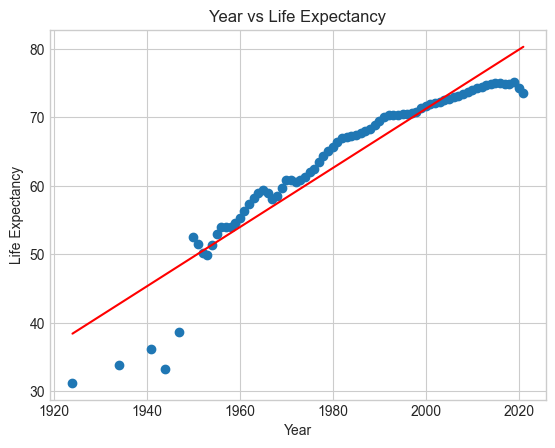

In [236]:
model = LinearRegression(fit_intercept=True)

x = CountryData['Year']
y = CountryData['Life Expectancy']

model.fit(x.to_numpy()[:, np.newaxis], y)

xfit = np.linspace(min(CountryData['Year']), max(CountryData['Year']), 1000)
yfit = np.clip(model.predict(xfit[:, np.newaxis]), 0, None)

plt.scatter(x, y)
plt.plot(xfit, yfit, color='red')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Year vs Life Expectancy')
plt.show()

In [237]:
model.predict([[year]])

array([49.62267755])